In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import mutual_info_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV


df=pd.read_csv("/content/predictive_maintenance.csv")
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [ ]:
import warnings as w
w.filterwarnings('ignore')

In [ ]:
df.isna().sum()

,0
UDI,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Target,0
Failure Type,0


In [ ]:
df.dtypes

,0
UDI,int64
Product ID,object
Type,object
Air temperature [K],float64
Process temperature [K],float64
Rotational speed [rpm],int64
Torque [Nm],float64
Tool wear [min],int64
Target,int64
Failure Type,object


In [ ]:
df.rename(columns={'Air temperature [K]': 'Air_temperature', 'Process temperature [K]': 'Process_temperature','Rotational speed [rpm]':'Rotational_speed','Tool wear [min]':'Tool_wear','Failure Type':'Failure_Type'},inplace=True)
df

,UDI,Product ID,Type,Air_temperature,Process_temperature,Rotational_speed,Torque [Nm],Tool_wear,Target,Failure_Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [ ]:
df.rename(columns={'Torque [Nm]': 'Torque'},inplace=True)
df

,UDI,Product ID,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Target,Failure_Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [ ]:
from sklearn.preprocessing import OrdinalEncoder


encoder=OrdinalEncoder()


cols=['Type']

df[cols] = encoder.fit_transform(df[cols]).astype(int)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder1=LabelEncoder()
df['Failure_Type']=encoder1.fit_transform(df['Failure_Type']).astype(int)

In [ ]:
df.drop(['UDI','Product ID','Target'],axis=1,inplace=True)

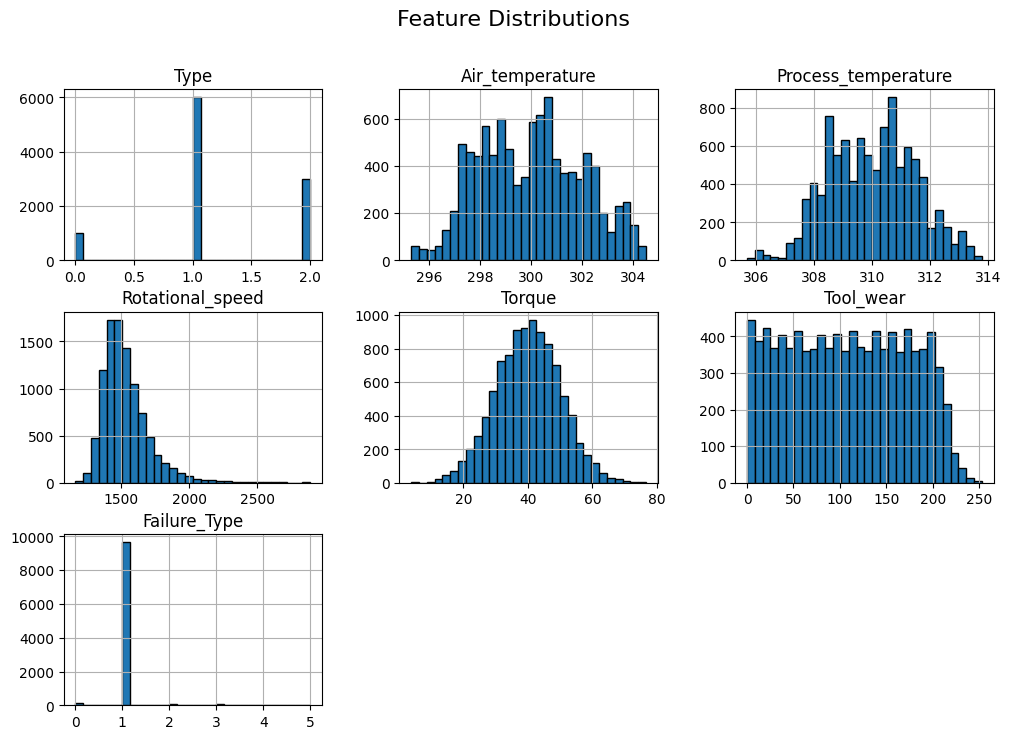

In [ ]:
#HISTOGRAM PLOT
df.hist(figsize=(12,8),bins=30,edgecolor='black')
plt.suptitle("Feature Distributions",fontsize=16)
plt.show()


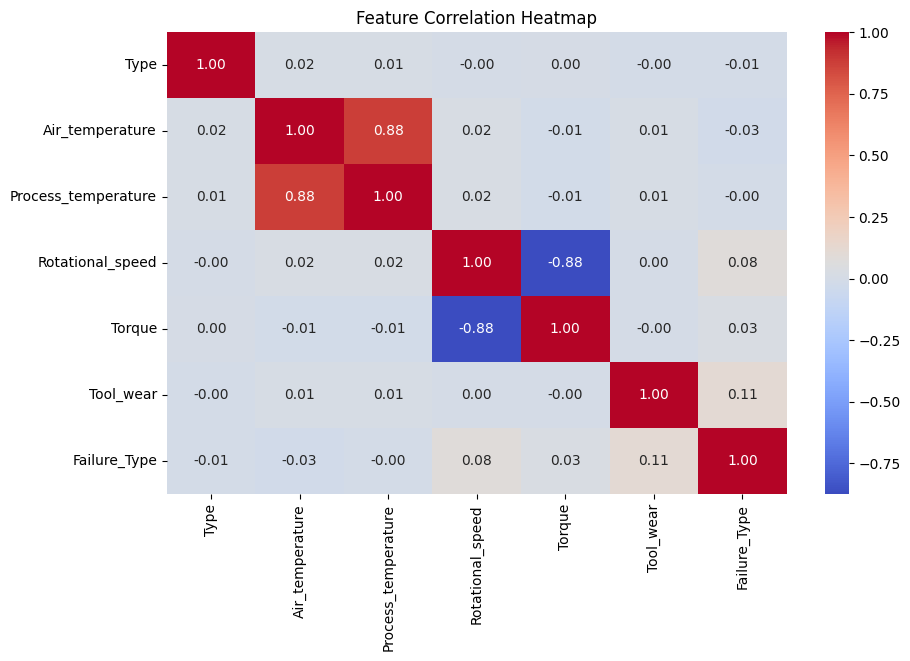

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

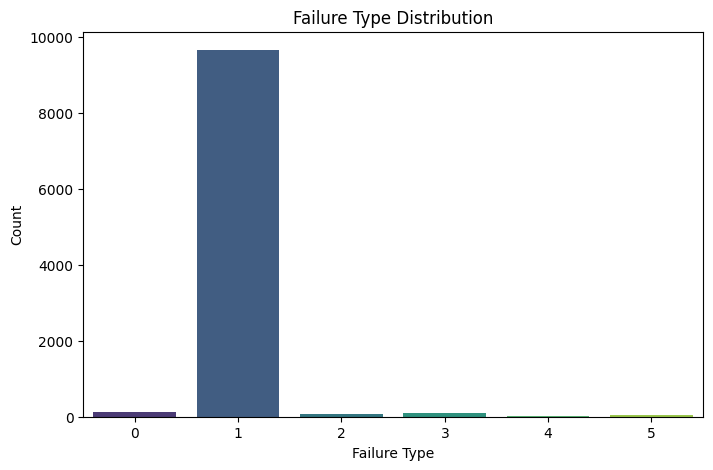

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Failure_Type"], palette="viridis")
plt.title("Failure Type Distribution")
plt.xlabel("Failure Type")
plt.ylabel("Count")
plt.show()

In [ ]:
X=df.iloc[:,:-1]
X

,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear
0,2,298.1,308.6,1551,42.8,0
1,1,298.2,308.7,1408,46.3,3
2,1,298.1,308.5,1498,49.4,5
3,1,298.2,308.6,1433,39.5,7
4,1,298.2,308.7,1408,40.0,9
...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14
9996,0,298.9,308.4,1632,31.8,17
9997,2,299.0,308.6,1645,33.4,22
9998,0,299.0,308.7,1408,48.5,25


In [ ]:
y=df.iloc[:,-1]
y

,Failure_Type
0,1
1,1
2,1
3,1
4,1
...,...
9995,1
9996,1
9997,1
9998,1


In [ ]:

scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[1.        , 0.30434783, 0.35802469, 0.22293364, 0.53571429,
        0.        ],
       [0.5       , 0.31521739, 0.37037037, 0.13969732, 0.58379121,
        0.01185771],
       [0.5       , 0.30434783, 0.34567901, 0.19208382, 0.62637363,
        0.01976285],
       ...,
       [1.        , 0.40217391, 0.35802469, 0.27764843, 0.40659341,
        0.08695652],
       [0.        , 0.40217391, 0.37037037, 0.13969732, 0.61401099,
        0.09881423],
       [1.        , 0.40217391, 0.37037037, 0.19324796, 0.5       ,
        0.11857708]])

In [ ]:

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(7000, 6) (7000,)
(3000, 6) (3000,)


In [ ]:
knn=KNeighborsClassifier()
svc=SVC()
nb=GaussianNB()
dtc=DecisionTreeClassifier()
rdf=RandomForestClassifier()
ada=AdaBoostClassifier()
gdb=GradientBoostingClassifier()
xgb=XGBClassifier()
models=[knn,svc,nb,dtc,ada,gdb,xgb,rdf]

In [ ]:
for model in models:
  model.fit(X_train,y_train)
  y_pred1=model.predict(X_test)
  print('\n\033[1;34m---------------------Model------------------\033[0m\n', model)
  print(classification_report(y_test,y_pred1,zero_division=0))


---------------------Model------------------
 KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.73      0.26      0.38        31
           1       0.97      1.00      0.98      2890
           2       0.92      0.41      0.56        27
           3       1.00      0.06      0.11        33
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00        11

    accuracy                           0.97      3000
   macro avg       0.60      0.29      0.34      3000
weighted avg       0.96      0.97      0.96      3000


---------------------Model------------------
 SVC()
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.97      1.00      0.98      2890
           2       0.67      0.15      0.24        27
           3       1.00      0.12      0.22        33
           4       0.00      0.00      0.00         8
         

In [ ]:
y.value_counts()

,count
Failure_Type,
1,9652
0,112
3,95
2,78
5,45
4,18


In [ ]:

osl=SMOTE(random_state=1)
X_os,y_os=osl.fit_resample(X,y)
y_os.value_counts()

,count
Failure_Type,
1,9652
3,9652
5,9652
2,9652
4,9652
0,9652


In [ ]:
X_os_scaled=scaler.fit_transform(X_os)
X_os_train,X_os_test,y_os_train,y_os_test=train_test_split(X_os_scaled,y_os,random_state=2,test_size=0.3)
X_os_train.shape,y_os_train.shape

((40538, 6), (40538,))

In [ ]:
for model in models:
  model.fit(X_os_train,y_os_train)
  y_pred2=model.predict(X_os_test)
  print('\n\033[1;34m---------------------Model------------------\033[0m\n', model)
  print(classification_report(y_os_test,y_pred2,zero_division=0))


---------------------Model------------------
 KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2909
           1       1.00      0.85      0.92      2929
           2       0.99      1.00      1.00      2901
           3       0.98      1.00      0.99      2880
           4       0.94      1.00      0.97      2900
           5       0.96      1.00      0.98      2855

    accuracy                           0.97     17374
   macro avg       0.98      0.97      0.97     17374
weighted avg       0.98      0.97      0.97     17374


---------------------Model------------------
 SVC()
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2909
           1       0.96      0.76      0.84      2929
           2       0.97      0.99      0.98      2901
           3       0.99      1.00      0.99      2880
           4       0.86      0.94      0.90      2900
         

In [ ]:
X_os.columns

Index(['Type', 'Air_temperature', 'Process_temperature', 'Rotational_speed',
       'Torque', 'Tool_wear'],
      dtype='object')

In [ ]:
#Features selection
features=['Type', 'Air_temperature', 'Process_temperature', 'Rotational_speed',
       'Torque', 'Tool_wear']

mi_values = mutual_info_classif(X_os_scaled, y_os)

mi_results = pd.DataFrame({'Feature': features, 'Mutual Information': mi_values})


print(mi_results)

               Feature  Mutual Information
0                 Type            0.098450
1      Air_temperature            0.646512
2  Process_temperature            0.520119
3     Rotational_speed            0.620803
4               Torque            1.034638
5            Tool_wear            0.553335


In [ ]:
X_os.drop(['Type'],axis=1)

,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear
0,298.100000,308.600000,1551,42.800000,0
1,298.200000,308.700000,1408,46.300000,3
2,298.100000,308.500000,1498,49.400000,5
3,298.200000,308.600000,1433,39.500000,7
4,298.200000,308.700000,1408,40.000000,9
...,...,...,...,...,...
57907,301.873405,309.938565,1443,46.171679,234
57908,300.300000,311.526224,1375,47.784149,220
57909,299.593897,309.222886,1865,23.454926,225
57910,300.300000,310.899452,1382,47.366301,216


In [ ]:
scaler=MinMaxScaler()
X_new_scaled=scaler.fit_transform(X_os)

In [ ]:
X_new_train,X_new_test,y_new_train,y_new_test=train_test_split(X_new_scaled,y_os,test_size=0.3,random_state=2)
X_new_train.shape,y_new_train.shape

((40538, 6), (40538,))

In [ ]:
acc=[]
for model in models:
  model.fit(X_new_train,y_new_train)
  y_pred3=model.predict(X_new_test)
  print('\n------Model------\n',model)
  print(classification_report(y_new_test,y_pred3,zero_division=0))
  acc.append(accuracy_score(y_new_test,y_pred3))


------Model------
 KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2909
           1       1.00      0.85      0.92      2929
           2       0.99      1.00      1.00      2901
           3       0.98      1.00      0.99      2880
           4       0.94      1.00      0.97      2900
           5       0.96      1.00      0.98      2855

    accuracy                           0.97     17374
   macro avg       0.98      0.97      0.97     17374
weighted avg       0.98      0.97      0.97     17374


------Model------
 SVC()
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2909
           1       0.96      0.76      0.84      2929
           2       0.97      0.99      0.98      2901
           3       0.99      1.00      0.99      2880
           4       0.86      0.94      0.90      2900
           5       0.91      0.97      0.94      2855

    accu

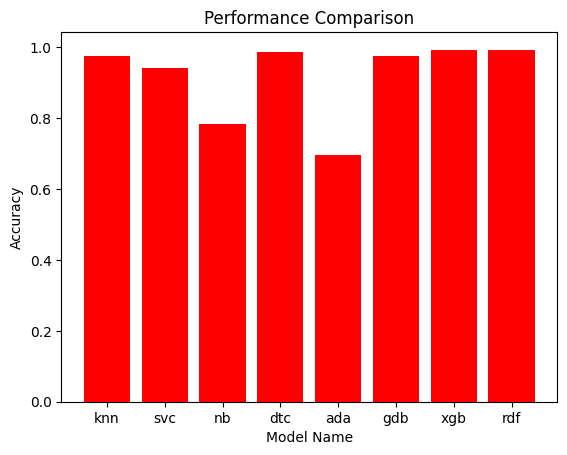

In [ ]:
model_names=['knn','svc','nb','dtc','ada','gdb','xgb','rdf']
plt.bar(model_names,acc,color='r')
plt.xlabel('Model Name')
plt.ylabel('Accuracy')
plt.title('Performance Comparison')
plt.show()

In [ ]:
params={'n_estimators':[10,50,100],
        'random_state':[1,2,3,4,5],
        "criterion":['gini', 'entropy', 'log_loss']}

In [ ]:

clf=RandomizedSearchCV(rdf,params,cv=7,scoring='accuracy')
clf.fit(X_new_train,y_new_train)

RandomizedSearchCV(cv=7, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'n_estimators': [10, 50, 100],
                                        'random_state': [1, 2, 3, 4, 5]},
                   scoring='accuracy')

In [ ]:
clf.best_params_

{'random_state': 2, 'n_estimators': 50, 'criterion': 'gini'}

In [ ]:
pred=clf.predict(X_new_test)
print(classification_report(y_new_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2909
           1       1.00      0.96      0.98      2929
           2       1.00      1.00      1.00      2901
           3       1.00      1.00      1.00      2880
           4       0.99      1.00      0.99      2900
           5       0.98      1.00      0.99      2855

    accuracy                           0.99     17374
   macro avg       0.99      0.99      0.99     17374
weighted avg       0.99      0.99      0.99     17374



In [ ]:
df['Type'].value_counts()

,count
Type,
1,6000
2,2997
0,1003


In [ ]:
pickle.dump(clf,open('Machinepredictive1.sav','wb'))
pickle.dump(scaler,open('MP_scaler1.sav','wb'))